# Predicting E-Commerce Revenue

## The Best Group
### Xi Yang, Yixin Sun, Ziyu Fan, Brian Chivers

# Given session-level data, can we predict a user's e-commerce revenue?

### Using data from Google's online merchandise store, we seek to accurately predict a consumer's spending

# Challenges

1) Imbalanced Data
    
98.7% of sessions did not make a transaction
98.6% of users did not make a transaction

2) Lack of continuous variables
   
Most data in web traffic is catagorical (Device info, location, time, redirect info, etc)

3) User-level data

A business doesn't market it's products to web sessions.  How do we aggregate this data to a user-level?

# EDA - Feature Importance and Engineering

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_flatten = pd.read_csv('../Data/train_flatten.csv', index_col=0)
df_flatten['transactionRevenue'].fillna(0,inplace=True)

## Transaction Level

Traffic Source

<img src="Final_Presentation_Images/traffic_source_pie_graph.png">

Percentage of transaction revenue per source

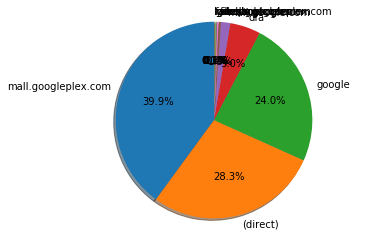

In [70]:
sizes = df_flatten.groupby('source')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].values
sizes = sizes/sum(df_flatten.groupby('source')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].values)
sizes = sizes*100

labels = df_flatten.groupby('source')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].axes[0].values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Hits, Page Views, and Visit Number
<img src="Final_Presentation_Images/hits_pviews_visitnum.png">

Mean revenue for a session's hits, page views, and visit number

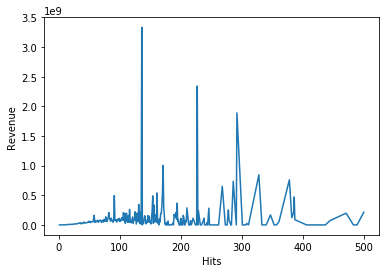

In [71]:
rev = df_flatten.groupby('hits')['transactionRevenue'].mean()
hits = df_flatten['hits'].sort_values().unique()
plt.plot(hits,rev)
plt.xlabel("Hits")
plt.ylabel("Revenue")
plt.show()

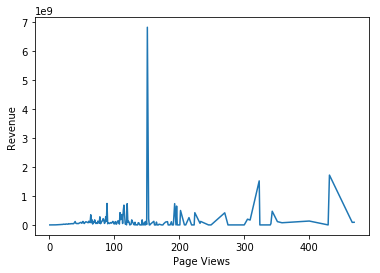

In [72]:
rev2 = df_flatten.groupby('pageviews')['transactionRevenue'].mean()
pviews = df_flatten['pageviews'].sort_values().unique()[:-1]

plt.plot(pviews,rev2)
plt.xlabel("Page Views")
plt.ylabel("Revenue")
plt.show()

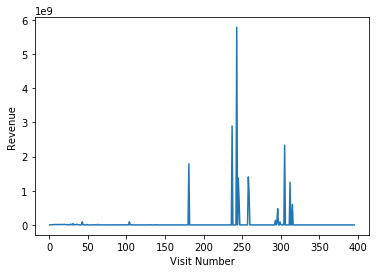

In [73]:
rev3 = df_flatten.groupby('visitNumber')['transactionRevenue'].mean()
visitNumber = df_flatten['visitNumber'].sort_values().unique()

plt.plot(visitNumber,rev3)
plt.xlabel("Visit Number")
plt.ylabel("Revenue")
plt.show()

# Time

<img src="Final_Presentation_Images/time_graphs.png">

Mean Revenue for hour of day, day of week, and week of year

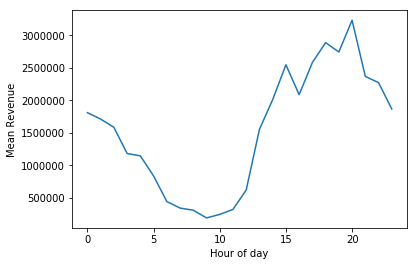

In [120]:
hour_rev = pd.concat([pd.to_datetime(df_flatten['visitStartTime'],unit='s').dt.hour,df_flatten['transactionRevenue']],axis=1).groupby('visitStartTime').mean().values
hours = np.array(list(range(0,24)))

plt.plot(hours,hour_rev)
plt.xlabel("Hour of day")
plt.ylabel("Mean Revenue")
plt.show()

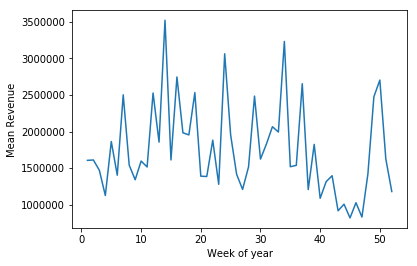

In [124]:
week_rev = pd.concat([pd.to_datetime(df_flatten['visitStartTime'],unit='s').dt.week,df_flatten['transactionRevenue']],axis=1).groupby('visitStartTime').mean().values
weeks = np.array(list(range(1,53)))

plt.plot(weeks,week_rev)
plt.xlabel("Week of year")
plt.ylabel("Mean Revenue")
plt.show()


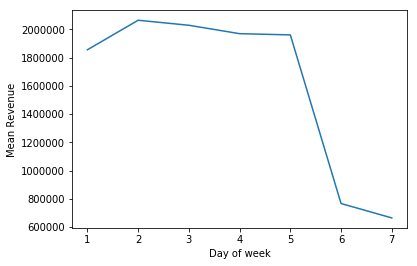

In [126]:
weekday_rev = pd.concat([pd.to_datetime(df_flatten['visitStartTime'],unit='s').dt.weekday,df_flatten['transactionRevenue']],axis=1).groupby('visitStartTime').mean().values
weekdays = np.array(list(range(1,8)))

plt.plot(weekdays,weekday_rev)
plt.xlabel("Day of week")
plt.ylabel("Mean Revenue")
plt.show()